# Two Root-Finding Algorithm Driven by Calculus

# Bisection Method
This method uses the invermediate value theorem to test for, and deduce, the existence of a root in an interval $[a,b]$, with $a<b$, for a *continuous* function $f:\mathbb{R}\to \mathbb{R}$.  

## Concept

The Bisection Method works by starting with two points, $a$ and $b$, such that the function values at these points have opposite signs, i.e., $f(a) \cdot f(b) < 0$. This implies (by the Intermediate Value Theorem) that there is at least one root in the interval $(a, b)$.

The algorithm proceeds as follows:

1. Calculate the midpoint $c = \frac{a + b}{2}$.
2. Evaluate the function at $c$: $f(c)$.
3. Check the sign of $f(c)$:
   - If $f(c) = 0$, then $c$ is the root.
   - If $f(a) \cdot f(c) < 0$, the root lies between $a$ and $c$, so set $b = c$.
   - Otherwise, the root lies between $c$ and $b$, so set $a = c$.
4. Repeat the process until the interval is small enough, i.e., $|b - a|$ is below a specified tolerance.

The Bisection Method is guaranteed to converge if the function is continuous on the interval and $f(a) \cdot f(b) < 0$.


## Let's Implement it

In [7]:
# Bisection Method Implementation
def bisection_method(f, a, b, tol=1e-7, max_iter=100):
    """
    Bisection Method for finding roots of a function f(x) = 0.

    Parameters:
    f        : The function for which we want to find the root.
    a        : The start of the interval [a, b].
    b        : The end of the interval [a, b].
    tol      : Tolerance for convergence.
    max_iter : Maximum number of iterations allowed.

    Returns:
    The estimated root of the function.
    """
    if f(a) * f(b) >= 0:
        print("The Bisection Method cannot be applied. f(a) and f(b) must have opposite signs.")
        return None

    for i in range(max_iter):
        # Compute the midpoint
        c = (a + b) / 2
        fc = f(c)

        # If the midpoint is the root or the interval is sufficiently small, return the result
        if abs(fc) < tol or abs(b - a) < tol:
            print(f"Converged after {i+1} iterations.")
            return c

        # Decide the new interval based on the sign of f(c)
        if f(a) * fc < 0:
            b = c  # Root lies between a and c
        else:
            a = c  # Root lies between c and b

    print("Exceeded maximum iterations. No solution found.")
    return None


### Example
Let's apply the Bisection Method to find the root of the function $f(x) = x^2 - 2$, which has a root in the interval [1, 2]. This root corresponds to $\sqrt{2}$.

In [8]:
# Define the function
f = lambda x: x**2 - 2

# Initial interval [a, b]
a = 1
b = 2

# Call Bisection Method
root = bisection_method(f, a, b)
print(f"Estimated root: {root}")


Converged after 23 iterations.
Estimated root: 1.4142135381698608


#### Visualization
We can also visualize how the Bisection Method works by plotting the function $f(x) = x^2 - 2$ and marking the intervals at each step.


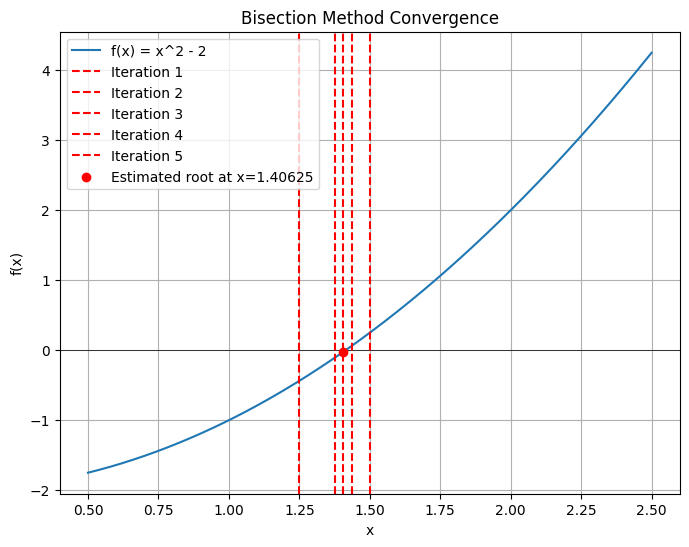

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function again
f = lambda x: x**2 - 2

# Generate x values for plotting
x_vals = np.linspace(0.5, 2.5, 400)
y_vals = f(x_vals)

# Set up the plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 - 2')
plt.axhline(0, color='black',linewidth=0.5)

# Initial interval
a = 1
b = 2

# Perform iterations and plot
for i in range(5):  # Perform 5 iterations
    c = (a + b) / 2
    plt.axvline(c, color='red', linestyle='--', label=f'Iteration {i+1}')
    
    if f(a) * f(c) < 0:
        b = c
    else:
        a = c

# Mark the final estimated root
plt.scatter(c, f(c), color='red', zorder=5, label=f'Estimated root at x={c:.5f}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Bisection Method Convergence")
plt.legend()
plt.grid(True)
plt.show()


---

---

---

# Newton's Method for Finding Roots

## Introduction

Newton's Method is an iterative process for finding successively better approximations to the roots (or zeroes) of a real-valued function. It works by approximating the function locally with a linear approximation (tangent line) and using the x-intercept of the tangent as the next guess for the root.

In this notebook, we will:

1. Explain the mathematical derivation of Newton's method.
2. Implement the method in Python.
3. Use an example function to demonstrate how the method works.


# The Calculus behind Newton's Method

## Derivation

Given a function $f(x)$, we want to find $x$ such that $f(x) = 0$. Newton's method assumes we start with an initial guess $x_0$, and then iteratively improve it using the following formula:

$$
x_{n+1} := x_n - \frac{f(x_n)}{f'(x_n)}
\mbox{ and }
x_0 \mbox{ some random point in } \mathbb{R}.
$$

Where:
- $f(x_n)$ is the value of the function at the current guess $x_n$,
- $f'(x_n)$ is the derivative of the function at $x_n$,
- $x_{n+1}$ is the new approximation for the root.

The method works by using the tangent line at $x_n$ to approximate the function near $x_n$, and then finding the x-intercept of this tangent line.

### Algorithm Steps:
1. Choose an initial guess $x_0$.
2. Calculate the next approximation using the formula:
   \[
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
   \]
3. Repeat until the difference between successive approximations is below a certain tolerance.


# An Implementation

In [3]:
# Newton's Method Implementation
def newtons_method(f, df, x0, tol=1e-7, max_iter=1000):
    """
    Newton's Method for finding roots of a function f(x) = 0.

    Parameters:
    f       : The function for which we want to find the root.
    df      : The derivative of the function f.
    x0      : Initial guess for the root.
    tol     : Tolerance for convergence.
    max_iter: Maximum number of iterations allowed.

    Returns:
    The estimated root of the function.
    """
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            print(f"Converged after {i} iterations.")
            return x
        if dfx == 0:
            print("Derivative is zero. No solution found.")
            return None
        x = x - fx / dfx
    print("Exceeded maximum iterations. No solution found.")
    return None

### Example

Let's apply Newton's method to find the square root of 2. We'll use the function $f(x) = x^2 - 2$, which has a root at $\sqrt{2}$.

The derivative of this function is $f'(x) = 2x$.

We'll use an initial guess of $x_0 = 1.0$ and see how the method converges.


In [4]:
# Define the function and its derivative
f = lambda x: x**2 - 2   # Example: Finding square root of 2
df = lambda x: 2*x

# Initial guess
x0 = 1.0

# Call Newton's method
root = newtons_method(f, df, x0)
print(f"Estimated root: {root}")


Converged after 4 iterations.
Estimated root: 1.4142135623746899


### Visualization

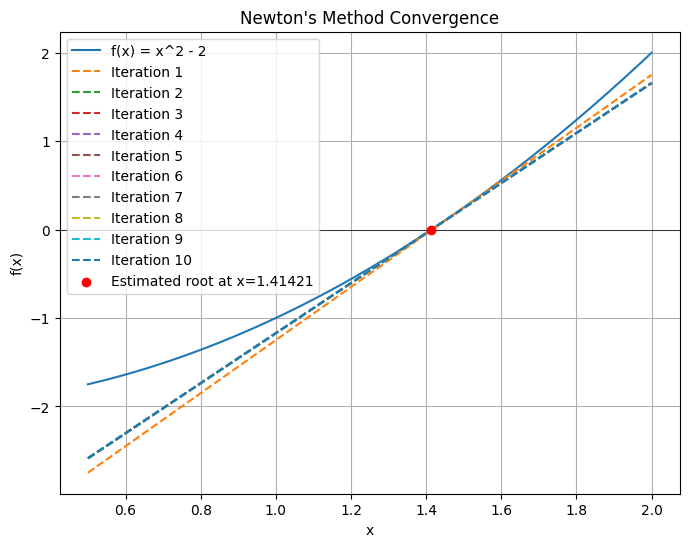

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
f = lambda x: x**2 - 2
df = lambda x: 2*x

# Generate x values for plotting
x_vals = np.linspace(0.5, 2, 400)
y_vals = f(x_vals)

# Initial guess
x0 = 1.5

# Set up plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label='f(x) = x^2 - 2')
plt.axhline(0, color='black',linewidth=0.5)

# Perform iterations and plot the tangents
x = x0
for i in range(10):  # Perform 5 iterations
    fx = f(x)
    dfx = df(x)
    
    # Plot the tangent line
    tangent = dfx*(x_vals - x) + fx
    plt.plot(x_vals, tangent, '--', label=f'Iteration {i+1}')
    
    # Update x using Newton's method
    x = x - fx / dfx

# Mark the final root
plt.scatter(x, f(x), color='red', zorder=5, label=f'Estimated root at x={x:.5f}')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title("Newton's Method Convergence")
plt.legend()
plt.grid(True)
plt.show()